<a href="https://colab.research.google.com/github/michalis0/DataScience_and_MachineLearning/blob/master/Week_6/Text_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#nltk.download('punkt')
# we update and install spaCy
# !pip install -U spacy

In [4]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=638653089324ecfd05f477695ba63502f59950a96cef7cd6232dc588b65c3244
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


It's much easier to use an existing library that does all this preprocessing for us (but it's limited to wikipedia articles).

In [5]:
import wikipedia

topics = ["Albert Einstein",
          "Augusta Ada",
          "Abraham Lincoln",
          "Stephen Hawking",
          "Steven Paul Jobs",
          "William Gates",
          "William Clinton"

]

data = [wikipedia.summary(topics[p], sentences=20) for p in range(len(topics))]

# we will try this later
# data = [wikipedia.page(topics[p]).content for p in range(len(topics))]

In [6]:
# show the first sentences about Ada Lovelace
data[1]

"Augusta Ada King, Countess of Lovelace (née Byron; 10 December 1815 – 27 November 1852) was an English mathematician and writer, chiefly known for her work on Charles Babbage's proposed mechanical general-purpose computer, the Analytical Engine. She was the first to recognise that the machine had applications beyond pure calculation.\nAda Byron was the only legitimate child of poet Lord Byron and reformer Anne Isabella Milbanke. All Lovelace's half-siblings, Lord Byron's other children, were born out of wedlock to other women. Byron separated from his wife a month after Ada was born and left England forever.  He died in Greece when Ada was eight. Her mother was anxious about her upbringing and promoted Ada's interest in mathematics and logic in an effort to prevent her from developing her father's perceived insanity. Despite this, Ada remained interested in him, naming her two sons Byron and Gordon. Upon her death, she was buried next to him at her request. Although often ill in her c

## Converting the text into vectors

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
import pandas as pd

stopwords = text.ENGLISH_STOP_WORDS

# using default tokenizer
count = CountVectorizer(ngram_range=(1,2), stop_words = None)
bow = count.fit_transform(data)

## Computing the Cosine Similarity

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# compute first item against all the rest
cosine_similarity(bow[0:1], bow)

array([[1.        , 0.29914381, 0.60359414, 0.46916132, 0.60612119,
        0.52311841, 0.47841397]])

Find the maximum cosine similarity, except the diagonal, to see with whom "Albert Einstein" is more similar to.

Now let's see all the pairwise similarities.


In [9]:
pairwise_similarities = cosine_similarity(bow, bow)

pairwise_df = pd.DataFrame(
    pairwise_similarities,
    columns = topics,
    index = topics
)
pairwise_df

,Albert Einstein,Augusta Ada,Abraham Lincoln,Stephen Hawking,Steven Paul Jobs,William Gates,William Clinton
Albert Einstein,1.000000,0.299144,0.603594,0.469161,0.606121,0.523118,0.478414
Augusta Ada,0.299144,1.000000,0.314853,0.238203,0.327052,0.282611,0.267665
Abraham Lincoln,0.603594,0.314853,1.000000,0.472707,0.569862,0.492151,0.557096
Stephen Hawking,0.469161,0.238203,0.472707,1.000000,0.427401,0.385351,0.373807
Steven Paul Jobs,0.606121,0.327052,0.569862,0.427401,1.000000,0.547258,0.465636
William Gates,0.523118,0.282611,0.492151,0.385351,0.547258,1.000000,0.433794
William Clinton,0.478414,0.267665,0.557096,0.373807,0.465636,0.433794,1.000000


<Axes: >

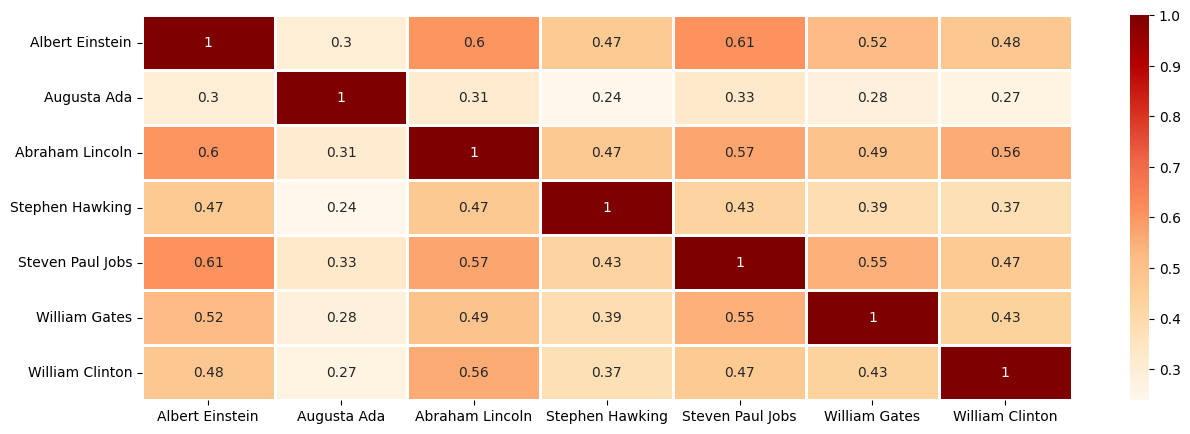

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# show it
plt.figure(figsize=(15,5))
sns.heatmap(
    pairwise_df,
    cmap='OrRd',
    linewidth=1,
    annot=True
)

# Exercise 1

In the first block, uncomment this code:

> `# data = [wikipedia.page(topics[p]).content for p in range(len(topics))]`

to get the full text from each wikipedia entry, not just a summary.

**Questions**:
1. What do you notice in the pairwise similarities?
2. Why is this happening?

# Exercise 2

We will remedy what you noticed before.

1. How can we do it?
2. How does the new pairwise matrix look like now?